# Aula 4 - Pandas e Seaborn

Nessa aula, iremos tratar dos seguintes conteúdos:
- Combinando DataFrames
- Agrupamentos no Pandas
- Seaborn
- Arquivos de Dados do Seaborn
- Outras Visualizações do Seaborn

In [10]:
import pandas as pd
import numpy as np

In [49]:
world_happiness = pd.read_csv('../datasets/world-happiness-report.csv')

In [52]:
world_happiness[world_happiness['year'] == 2020]['Life Ladder'].mean()

5.8405999999999985

In [44]:
world_happiness_2021 = pd.read_csv('../datasets/world-happiness-report-2021.csv')

In [48]:
world_happiness_2021['Ladder score'].mean()

5.532838926174497

## Comentario interessante
__Marcelo Heinrich__ -  Alguns sets do Kaggle tem dados com encoding  não ascii ai temos que usar o parâmetro "encoding " no read_csv, ex.: df = pd.read_csv(''meuset.csv', encoding = 'ISO-8859-1')

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fusão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

In [54]:
# Construindo dois DataFrames que serão fundidos com o método 'merge'
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b','d'], 
                   'data2': range(5)})

# Print do primeiro Dataframe
print(df1)

# Print do Segundo Dataframe
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
3   b      3
4   d      4


In [55]:
# Usando o merge a partir de uma chave primaria
pd.merge(df1, df2, on='key') ## Recebe dois dataframes e uma chave

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [61]:
# Com o how podemos passar o tipo merge que queremos fazer (left, right, inner, outer)
pd.merge(df1, df2, on='key', how='right') ## .dtypes -> Mostra os tipos de dados
## NaN é como o python lida com nulos e brancos -> Quer dizer Not a Number

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2
7,b,0.0,3
8,b,1.0,3
9,b,6.0,3


In [82]:
df_merge = pd.merge(df1, df2, on='key', how='right')#.astype({'data1' : 'int32'})
df_merge[df_merge['data1'].isna()] = 0
df_merge.astype({'data1' : 'int32'})

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,0,0,0
7,b,0,3
8,b,1,3
9,b,6,3



### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [68]:
# Construindo 3 séries especificando os rótulos das linhas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([1,5, 6], index=['a','f', 'd']) 

# Print das Series
print(s1)
print(s2)
print(s3)

# Contatenando as 3 séries na vertical (axis=0 por default)
# concat recebe uma lista de series ou dataframes
pd.concat([s1, s2, s3]) ## recebe uma lista de series ou dataframes

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
a    1
f    5
d    6
dtype: int64


a    0
b    1
c    2
d    3
e    4
a    1
f    5
d    6
dtype: int64

In [69]:
# Concatenando as 3 séries por colunas especificando o parâmetro 'axis=1'
pd.concat([s1, s2, s3], axis=1) 

,0,1,2
a,0.0,NaN,1.0
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,6.0
e,NaN,4.0,NaN
f,NaN,NaN,5.0


### pivot
O método __pivot__ é o equivalente do Pivot table do excel

In [71]:
df_titanic = pd.read_csv('../datasets/titanic.csv')

### Parametros -> Dataset, valores = valores que vou calcular, index = linhas, columns = colunas
### aggfunc = Função agregada (que consolida os dados)
pd.pivot_table(df_titanic, values='Age', index='Pclass', columns='Sex', aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fsazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

Funções agregadas são funções que consolidam informação:

No SQL são 5:
- Sum, 
- mean (ou avg), 
- count,
- min, 
- max

In [72]:
# Calcula a média de Idade por Sexo
## para agruparmos usamos o metodo group by
## no parentesis passamos uma coluna ou um conjunto de colunas
## Depois precisamos passar entre colchetes o campo que vamos agrupar
## Por fim passamos a metrica que queremos

df_titanic.groupby(["Sex"])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

In [73]:
# Calculo das Métricas para o Agrupamento Sexo e Idade
# Quero calcular muitas metricas na mesma linha
# podemos usar o .agg e passar uma lista de metricas

df_titanic.groupby(['Sex'])['Age'].agg(["mean", "median", "std", "count"])

,mean,median,std,count
Sex,,,,
female,27.915709,27.0,14.110146,261
male,30.726645,29.0,14.678201,453


In [76]:
# Com mais de uma categoria dentro do Groupby
# Quero ter mais de uma categoria
# Podemos passar no parentesis uma lista de colunas também

df_titanic.groupby(["Pclass", "Sex"])["Age"].agg(["mean", "median", "std", "count"])

mean  median        std  count
Pclass Sex                                        
1      female  34.611765    35.0  13.612052     85
       male    41.281386    40.0  15.139570    101
2      female  28.722973    28.0  12.872702     74
       male    30.740707    30.0  14.793894     99
3      female  21.750000    21.5  12.729964    102
       male    26.507589    25.0  12.159514    253

In [77]:
# Mais de uma categoria e mais de uma métrica calculando
# Podemos calcular para um conjunto de dados diferentes as metricas
# basta passar no indexador (no colchete) uma lista de colunas

df_titanic.groupby(["Sex", "Pclass"])[["Age", 'Survived']].agg(["mean", "median", "std", "count"])

Age                          Survived                   \
                    mean median        std count      mean median       std   
Sex    Pclass                                                                 
female 1       34.611765   35.0  13.612052    85  0.968085    1.0  0.176716   
       2       28.722973   28.0  12.872702    74  0.921053    1.0  0.271448   
       3       21.750000   21.5  12.729964   102  0.500000    0.5  0.501745   
male   1       41.281386   40.0  15.139570   101  0.368852    0.0  0.484484   
       2       30.740707   30.0  14.793894    99  0.157407    0.0  0.365882   
       3       26.507589   25.0  12.159514   253  0.135447    0.0  0.342694   

                     
              count  
Sex    Pclass        
female 1         94  
       2         76  
       3        144  
male   1        122  
       2        108  
       3        347

## Exercício

1 - Utilize uma função agregada para saber a passagem média e também a soma do dinheiro gasto em passagens por ponto de embarque

2 - Utilize o pivot table para calcular o total de dinheiro gasto em passagens por homens e mulheres de classe

In [87]:
df_titanic.groupby(['Embarked'])['Fare'].agg(["mean", "sum"])

,mean,sum
Embarked,,
C,59.954144,10072.2962
Q,13.276030,1022.2543
S,27.079812,17439.3988


In [85]:
pd.pivot_table(df_titanic, values='Fare', index='Pclass', columns='Sex', aggfunc=np.sum)

Sex,female,male
Pclass,,
1,9975.8250,8201.5875
2,1669.7292,2132.1125
3,2321.1086,4393.5865


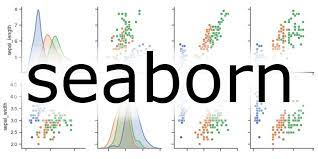

## 

## Seaborn

Quando falamos de visualização de dados, além do __Matplotlib__ uma das principais bibliotecas que temos para utilizar é o __Seaborn__.<br>
<br>
O __Seaborn__ é uma biblioteca baseado no próprio _Matplotlib_, mas focada em gráficos de alta performance, ou seja iremos fazer gráficos de uma maneira __mais simples__ e com uma __riqueza maior nas informações__ que queremos passar com os gráficos.

Para instalar o __Seaborn__ no seu Jupyter Notebooks (quando não tenha já instalado), precisa ser descomentar e rodar o código abaixo:

In [5]:
#!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Primeiro passo será importarmos a bibloteca para o notebook:

In [88]:
# Carregando a Biblioteca
import seaborn as sns

Além do __Seaborn__, vamos importar algumas outras bibliotecas que serão úteis durante a aula:

In [89]:
# Carregando outras bibliotecas bem úteis
import matplotlib.pyplot as plt

## 

## Arquivos de Datasets do Seaborn

Utilizando a função __load_dataset__, conseguimos carregar alguns datasets bem conhecidos na aprendizagem de Data Science como por exemplo o _Titanic_, _Tips_ entre outros. Podemos consultar todos os datasets disponíveis usando a função __get_dataset_names__:

In [90]:
# usando a função get_dataset_names para saber todos os datasets disponíveis
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Vamos utilizar o dataset _Iris_ para começar as análises:

In [91]:
# Carrega o dataset Iris
iris = sns.load_dataset('iris')

In [97]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

O _Iris_ é um dataset bem conhecido sobre a classificação de 3 espécies de plantas: _setosa_, _virgínica_ e _versicolor_:<br><br>
<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width = 800>

Antes de partirmos para análises e novos gráficos de fato, vamos começar a exercitar as boas práticas quando trabalhamos com análise de dados:

In [103]:
# Olhando sobre o DataFrame e seu preenchimento
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Print das primeiras linhas do Iris
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
# Levantando as principais métricas estatísticas para o DataFrame
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vamos dar uma olhada como está dividido em cada uma das espécies da _Iris_:

In [16]:
# Value counts das categorias
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

##  

## Seaborn x Matplotlib

Primeiramente, vamos recordar como fazer um gráfico de dispersão usando o __Matplotlib__:

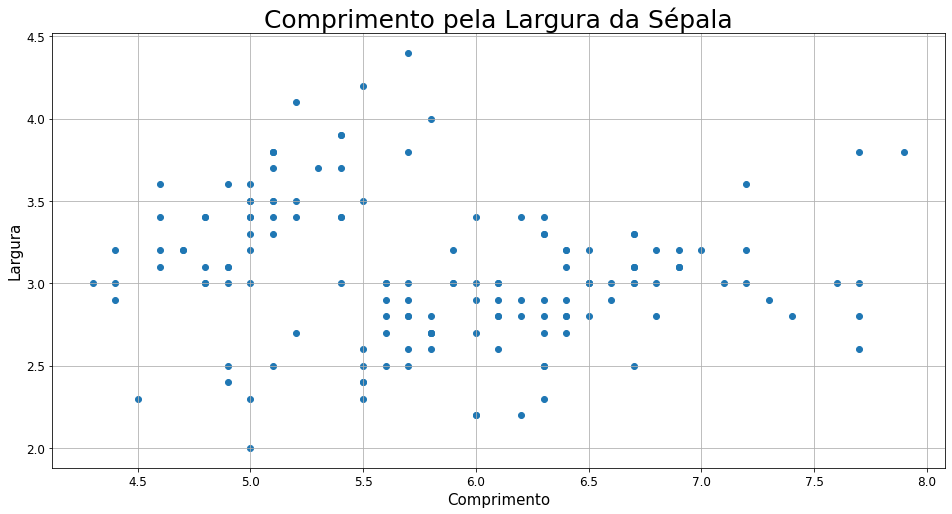

In [105]:
## Os comandos do matplotlib só são executados quando usamos o 
## plt.show()
# Ajustando o tamanho da Figura
plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
plt.scatter('sepal_length', 'sepal_width', data = iris)

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, podemos fazer o mesmo gráfico utilizando a função __scatterplot__: 

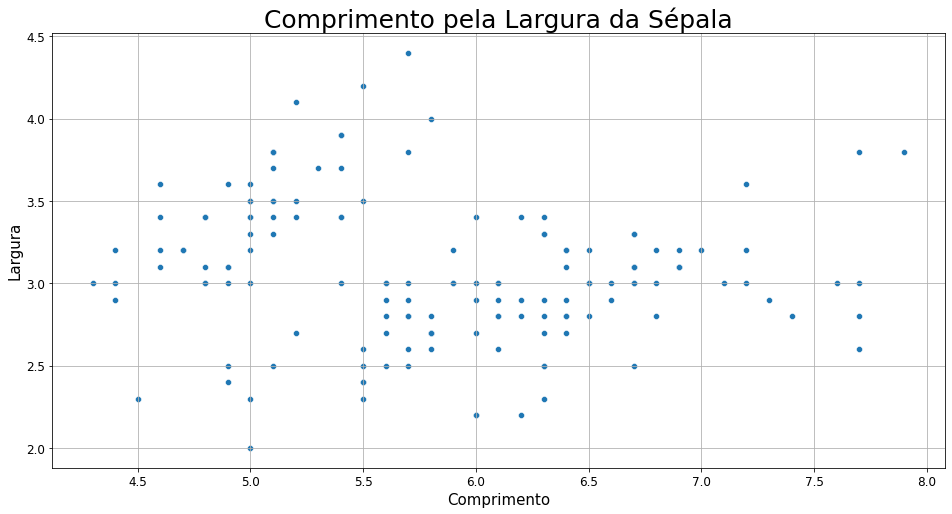

In [106]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
sns.scatterplot(data = iris, x='sepal_length', y='sepal_width')

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

Mas então, a primeira pergunta é: __quais são as vantagens de usar o Seaborn ao invés do Matplotlib?__<br><br>
Vamos imaginar que queremos fazer o mesmo gráfico mas separando as pelos tipos de _Iris_ (ou seja, separar pelas classes):

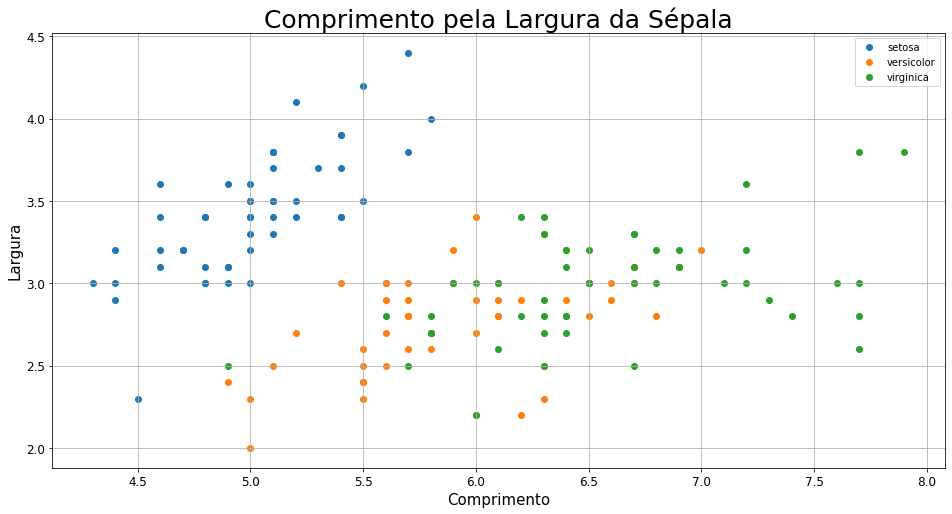

In [109]:
# Separe o DataFrame entre as 3 classes
df_set = iris[iris['species'] == 'setosa'] 
df_ver = iris[iris['species'] == 'versicolor'] 
df_vir = iris[iris['species'] == 'virginica'] 

# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de Dispersão
plt.scatter('sepal_length', 'sepal_width', data = df_set)
plt.scatter('sepal_length', 'sepal_width', data = df_ver)
plt.scatter('sepal_length', 'sepal_width', data = df_vir)


# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

## Colocar legenda
plt.legend(['setosa', 'versicolor', 'virginica'])

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, sempre que quisermos quebrar um gráfico nas classes basta passar um parâmetro chamado __hue__:

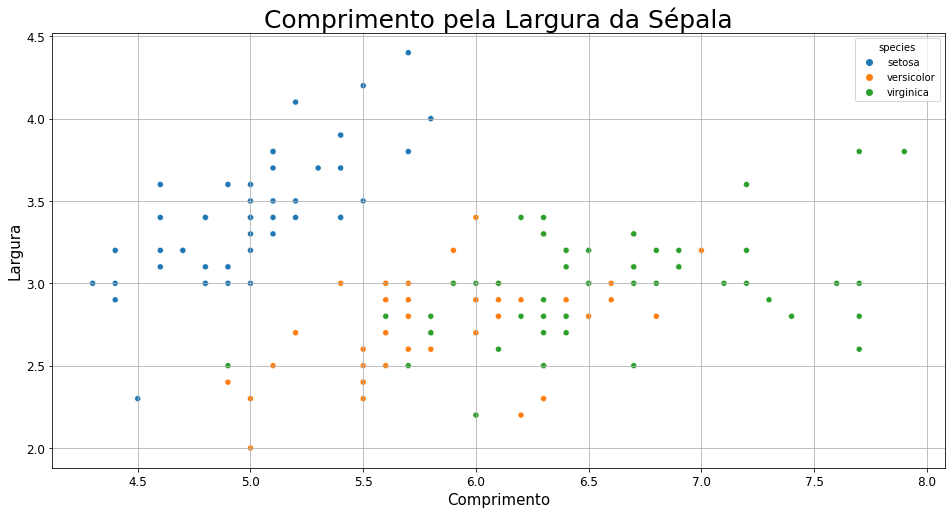

In [110]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
sns.scatterplot(data = iris, x='sepal_length', y='sepal_width', hue='species')

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

E o __Seaborn__ nos permite customizar diversas detalhes do nosso gráfico:

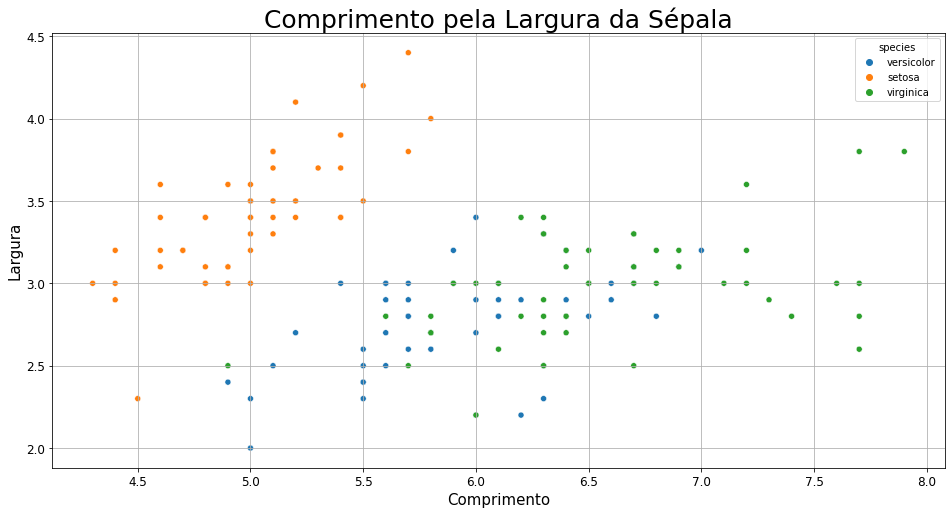

In [113]:
# Ajustando o tamanho da Figura

plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
sns.scatterplot(data = iris, x='sepal_length', y='sepal_width',
               hue='species', hue_order= ['versicolor', 'setosa', 'virginica'])

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

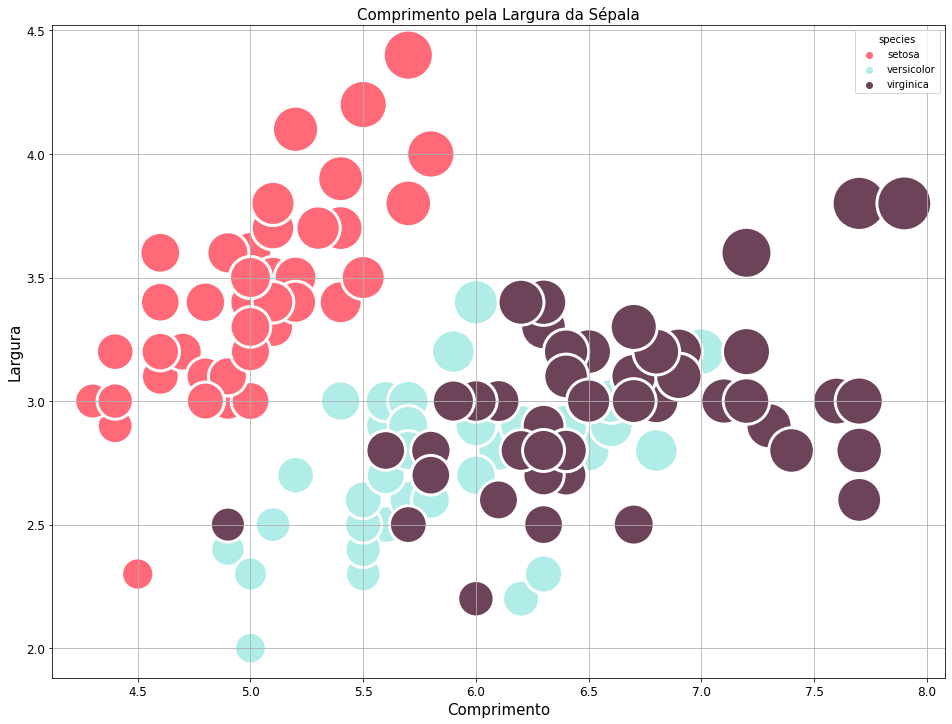

In [117]:
# Cria um valor de size no DataFrame
iris['size'] = iris['sepal_length'] * iris['sepal_width'] * 100

# Ajustando o tamanho da Figura
plt.figure(figsize=(16,12))

# Escolhendo um Pallete de Cores
palette = ["#FF6978", "#B1EDE8", "#6D435A"]

# Gráfico de Dispersão
sns.scatterplot(data = iris,
               x='sepal_length',
               y='sepal_width',
               palette=palette,
               hue = 'species',
               s = iris['size'])

# Coloca o titulo
plt.title('Comprimento pela Largura da Sépala', fontsize = 15)

# Titulo para eixo X
plt.xlabel('Comprimento', fontsize = 15)

# Titulo para eixo Y
plt.ylabel('Largura', fontsize = 15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()

Um site bem interessante que vocês podem escolher cores para monta o Palette Cutsomizado é o [Coolors](https://coolors.co/)

In [114]:
titanic = sns.load_dataset('titanic')

## Exercícios

1 - Utilize o dataset do titanic, junto com a estratégia do scatter plot colorido (exemplos acima), para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sexo biologico

2 - Utilize a mesma estratégia para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sobrevivencia

In [136]:
df_titanic['size'] = 500

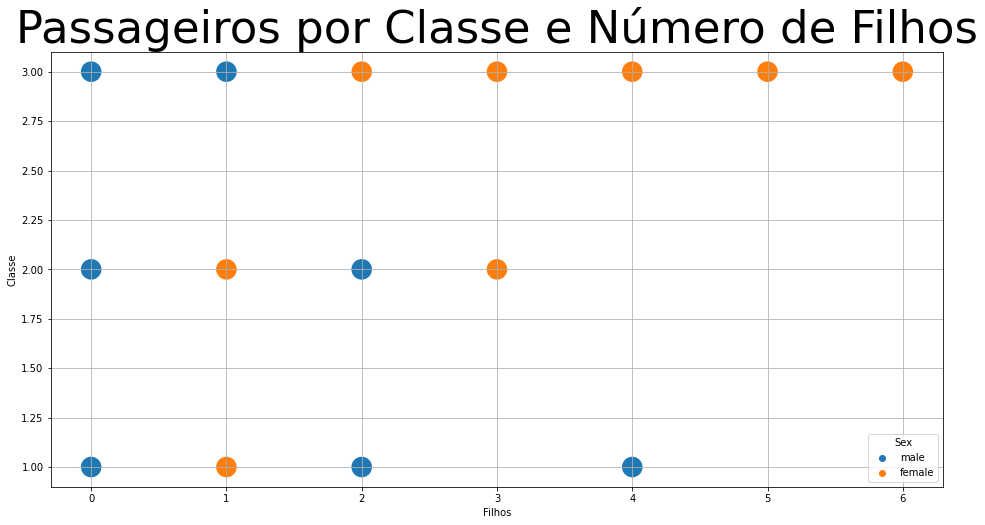

In [138]:
plt.figure(figsize = (16,8))

sns.scatterplot(data = df_titanic,
               x='Parch',
               y='Pclass',
               hue='Sex',
               s=df_titanic['size'])

plt.title('Passageiros por Classe e Número de Filhos', fontsize=45)

plt.xlabel('Filhos')

plt.ylabel('Classe')

plt.grid()

plt.show()

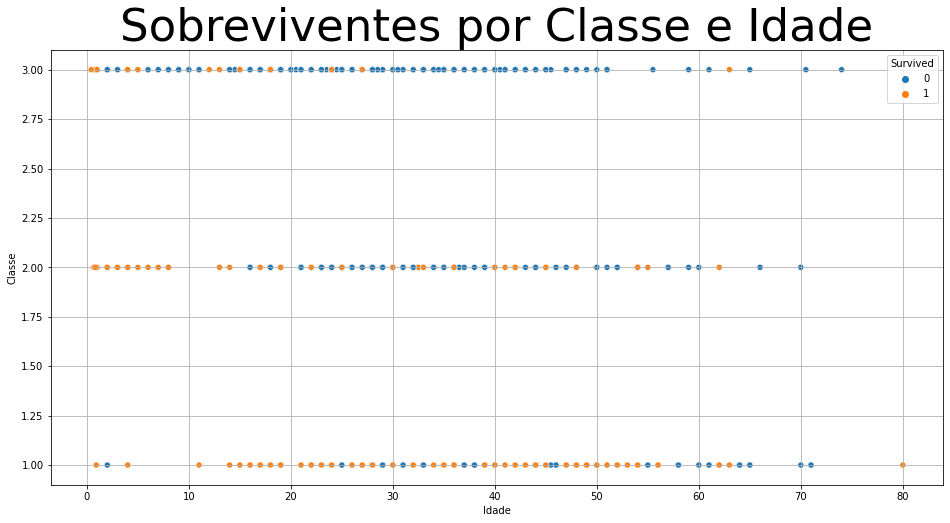

In [139]:
plt.figure(figsize = (16,8))

sns.scatterplot(data = df_titanic,
               x='Age',
               y='Pclass',
               hue='Survived')

plt.title('Sobreviventes por Classe e Idade', fontsize=45)

plt.xlabel('Idade')

plt.ylabel('Classe')

plt.grid()

plt.show()

## Outras Visualizações do Seaborn

Vamos passar agora, por algumas das principais visualizações que acabam sendo utilizadas do __Seaborn__:

### PairPlot

In [145]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
size             int64
dtype: object

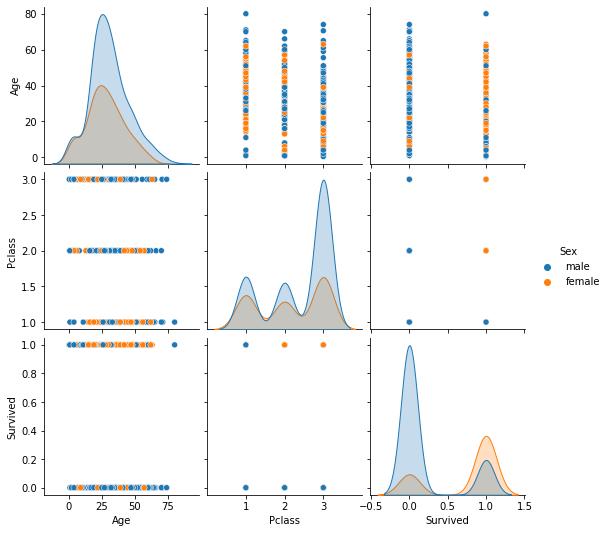

In [146]:
sns.pairplot(df_titanic[['Age', 'Pclass', 'Survived', 'Sex']], hue='Sex')

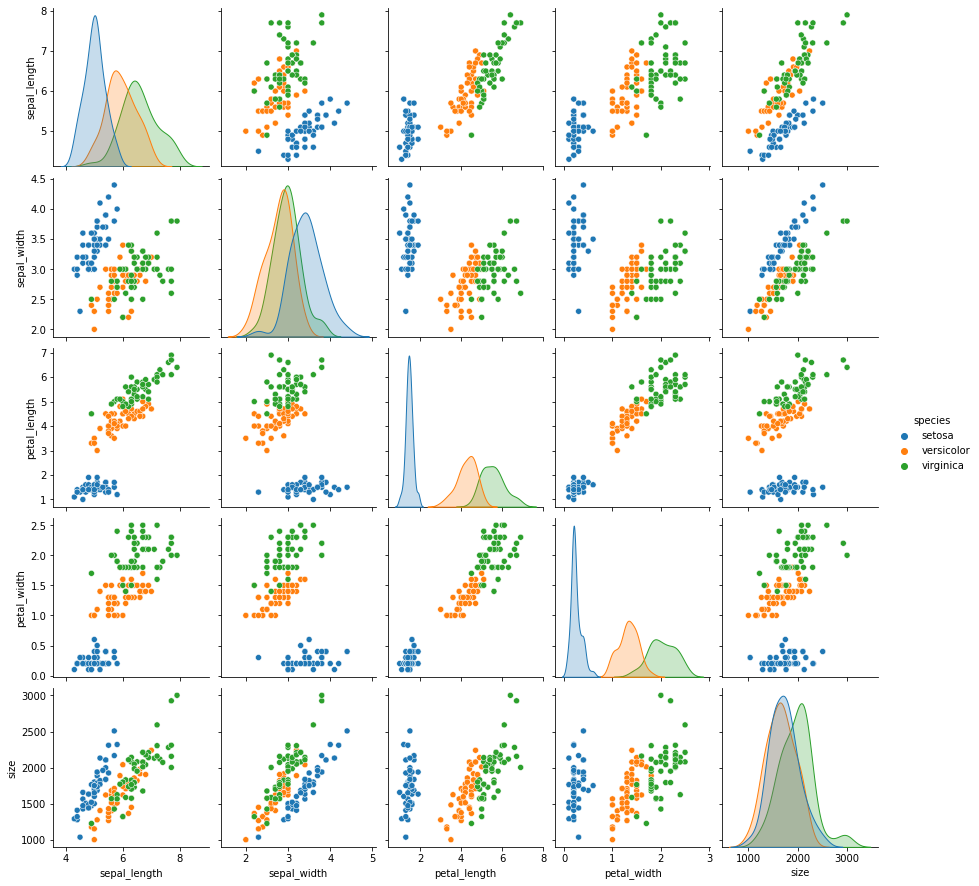

In [147]:
# Cria o pairplot
sns.pairplot(iris, hue='species')
# Mostra o gráfico
plt.show()

##  

### JointPlot

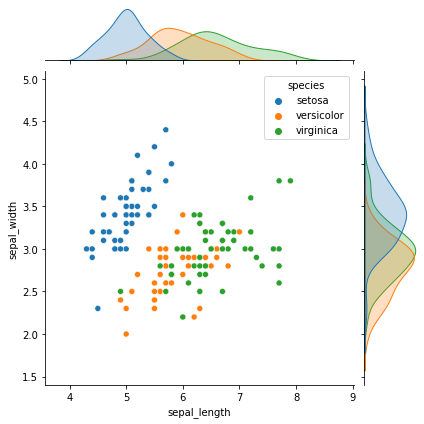

In [150]:
# Cria o Jointplot
sns.jointplot(data = iris, x='sepal_length', y='sepal_width', hue='species')
# Mostra o Gráfico
plt.show()

##  

### Distplot e Histplot

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


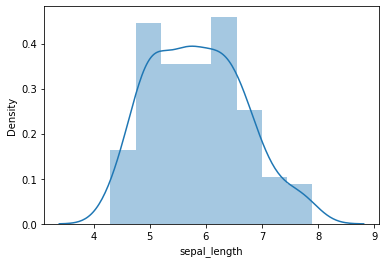

In [151]:
# Cria o distplot
sns.distplot(iris["sepal_length"])
#mostra o Gráfico
plt.show()

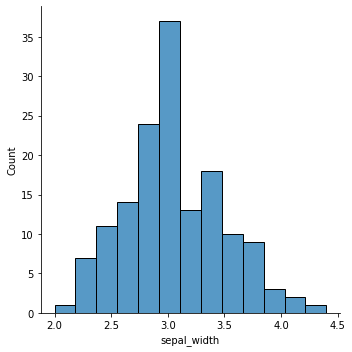

In [152]:
# Cria o displot
sns.displot(iris['sepal_width'])

#mostra o Gráfico
plt.show()

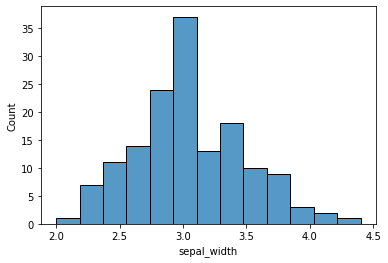

In [153]:
# Cria o distplot
sns.histplot(iris['sepal_width'])
#mostra o Gráfico
plt.show()

##  

### FacetGrid

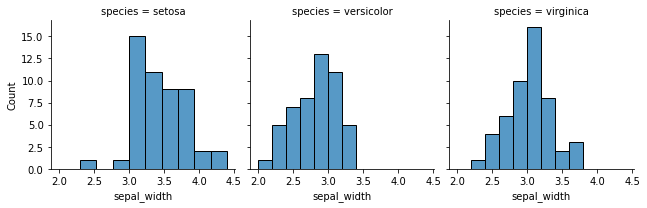

In [155]:
# Cria o FacetGrid
grid = sns.FacetGrid(iris, col='species')

# Cria o gráfico relacionado
grid.map(sns.histplot, 'sepal_width')

# Mostra o Gráfico
plt.show()

##  

### LMPlot

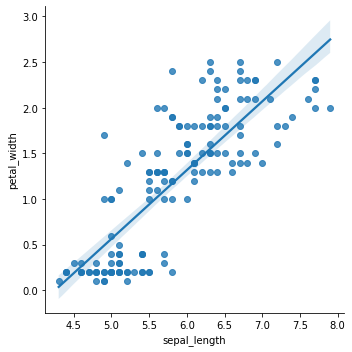

In [157]:
# Constroi o LMPlot
sns.lmplot(data = iris,
          x = 'sepal_length',
          y = 'petal_width')

# Mostra o Gráfico
plt.show()

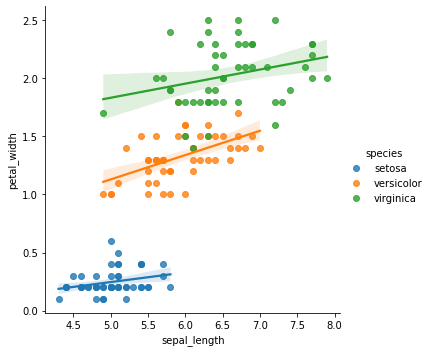

In [158]:
# Constroi o LMPlot
sns.lmplot(data = iris,
          x='sepal_length',
          y='petal_width',
          hue='species')

# Mostra o Gráfico
plt.show()

## 

### HeatMap

O __HeatMap__ (Mapa de Calor) é um gráfico bem interessante quando queremos criar um _Grid_ de variações.<br><br>
Para usar o HeatMap, vamos definir primeiramente as correlações do DataFrame _Iris_:

In [160]:
corr = iris.corr()

A função __corr__ mostra como as variáveis do DataFrame estão relacionadas, ou seja o quanto cada variável influência na variação das outras:

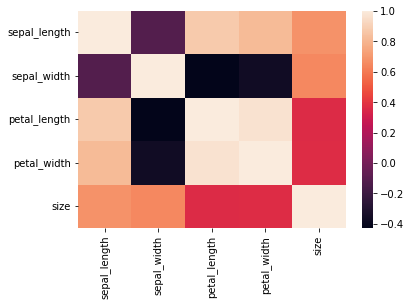

In [161]:
# Cria o HeatMap
sns.heatmap(corr)

# Mostra o Gráfico
plt.show()

## 

### CountPlot e BarPlot

<AxesSubplot:xlabel='species', ylabel='count'>

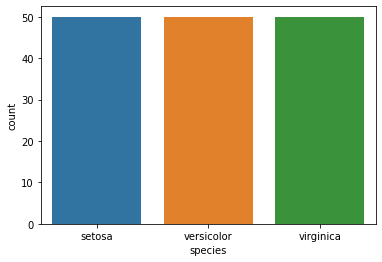

In [162]:
sns.countplot(data = iris, x='species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

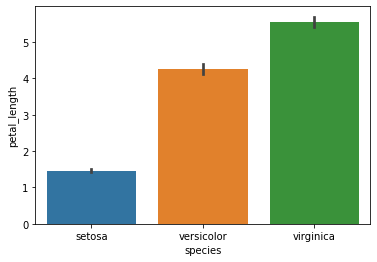

In [163]:
sns.barplot(data = iris, x='species', y='petal_length')

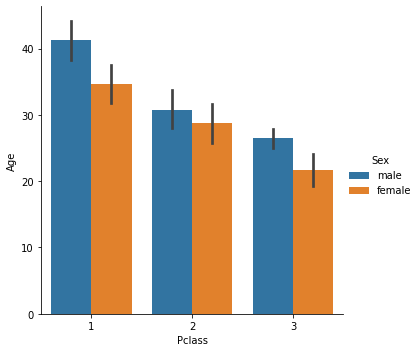

In [166]:
sns.catplot(data=df_titanic, kind='bar', x='Pclass', y='Age', hue='Sex')

## Exercícios

1 - Verifique se alguma outra combinação de variáveis é um bom classificador para sexo biologico

2 - Gere um histograma das idades do Titanic

Escolha um dataset da lista do começo da aula para os próximos exercícios

3 - Escolha um dataset da lista e utilize o pairplot para analisar o comportamento dos parametros

4 - Explore a documentação do seaborn e gere alguma visualização interessante que valide alguma hipótese do grupo

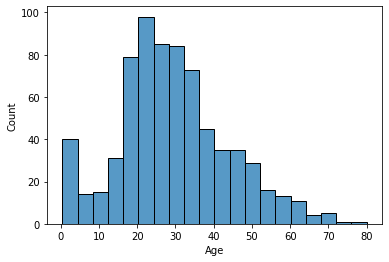

In [168]:
sns.histplot(df_titanic['Age'])

plt.show()

In [169]:
taxis = sns.load_dataset('taxis')

In [177]:
taxis['payment'].value_counts(normalize=True)

credit card    0.716388
cash           0.283612
Name: payment, dtype: float64

In [178]:
taxis['dropoff_borough'].value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

In [180]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [181]:
taxis[taxis['tip'] > 0].groupby(by='dropoff_borough').count()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough
dropoff_borough,,,,,,,,,,,,,
Bronx,18,18,18,18,18,18,18,18,18,18,18,18,18
Brooklyn,224,224,224,224,224,224,224,224,224,224,224,224,224
Manhattan,3632,3632,3632,3632,3632,3632,3632,3632,3632,3632,3629,3632,3629
Queens,224,224,224,224,224,224,224,224,224,224,224,224,224
Staten Island,2,2,2,2,2,2,2,2,2,2,2,2,2


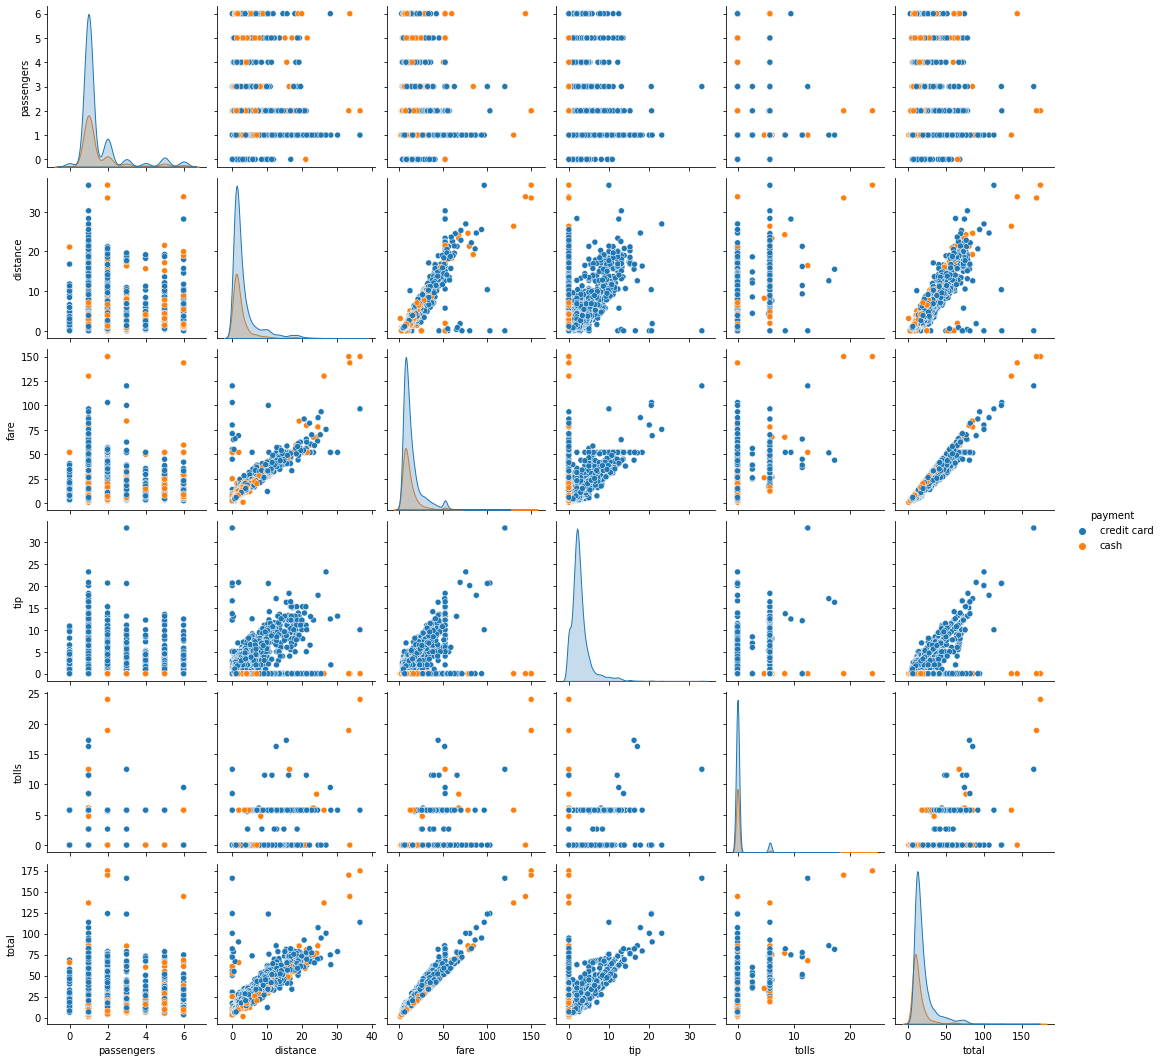

In [176]:
sns.pairplot(taxis, hue='payment')

## 

## Desafio

__1)__ Façam a análise exploratória com o que aprendemos até então (NumPy, Pandas, Matplotlib e Seaborn) num dataset do Kaggle.
Levante visualizações que possam ser interessantes e tentem interpretar os dados!

## 

## Links, Artigos e Referências:

- [Documentação do Matplotlib](https://matplotlib.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Matplotlib;
- [Documentação do Seaborn](https://seaborn.pydata.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Seaborn;
- [Documentação do Plotly](https://plotly.com/python/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Plotly;
- [Beautiful Plots with Python and Seaborn](https://betterprogramming.pub/beautiful-plots-with-python-and-seaborn-9d05c9ead6ed), artigo publicado no blog Better Programming
- [MAtplotlib vs Seaborn vs Plotly](https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb), artigo publicado pela Towards Data Science comparando as 3 bibliotecas;
- ["Como criar gráficos interativos utilizando Plotly e Python"](https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b?source=---------62----------------------------), artigo escrito por Paulo Vasconcellos para o Data Hackers.

https://www.kaggle.com/datasets/unsdsn/world-happiness